# Clusterização dos dados

## Vetorização

In [0]:
import pyspark.pandas as ps

In [0]:
path = 'dbfs:/FileStore/dados_spotify_tratados/data.parquet'
df_data = ps.read_parquet(path)

In [0]:
df_data.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170080 non-null  float64
 5   duration_ms       170454 non-null  int64  
 6   energy            170573 non-null  float64
 7   explicit          170606 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170270 non-null  float64
 10  key               170451 non-null  int64  
 11  liveness          170613 non-null  float64
 12  loudness          170621 non-null  float64
 13  mode              170635 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        169496 non-null  int64  
 16  release_date     

In [0]:
df_data.isnull().sum()

Out[95]: valence                0
year                   0
acousticness           0
artists                0
danceability         573
duration_ms          199
energy                80
explicit              47
id                     0
instrumentalness     383
key                  202
liveness              40
loudness              32
mode                  18
name                   0
popularity          1157
release_date           0
speechiness          611
tempo                249
dtype: int64

In [0]:
df_data.dropna(inplace = True)

In [0]:
df_data.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 169300 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           169300 non-null  float64
 1   year              169300 non-null  int64  
 2   acousticness      169300 non-null  float64
 3   artists           169300 non-null  object 
 4   danceability      169300 non-null  float64
 5   duration_ms       169300 non-null  int64  
 6   energy            169300 non-null  float64
 7   explicit          169300 non-null  int64  
 8   id                169300 non-null  object 
 9   instrumentalness  169300 non-null  float64
 10  key               169300 non-null  int64  
 11  liveness          169300 non-null  float64
 12  loudness          169300 non-null  float64
 13  mode              169300 non-null  int64  
 14  name              169300 non-null  object 
 15  popularity        169300 non-null  int64  
 16  release_date     

In [0]:
df_data['artists_song'] = df_data['artists'] + ' - ' + df_data['name']

In [0]:
df_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_song
0,0.917,1970,0.096000,The Velvet Underground,0.624,201440,0.774,0,60ZyiL4lmWzZyGfqyECTqp,0.030900,7,0.0960,-10.391,1,Train Round the Bend - 2015 Remaster,24,1970,0.0315,117.006,The Velvet Underground - Train Round the Bend ...
1,0.511,1970,0.001900,Ten Years After,0.405,458463,0.543,0,6DYyyUdHzI6RdSx0swUR1i,0.720000,2,0.1860,-9.313,1,Love Like a Man - 2017 Remaster,34,1970-04-01,0.0290,107.598,Ten Years After - Love Like a Man - 2017 Remaster
2,0.466,1970,0.052800,The Mothers Of Invention,0.444,105587,0.568,0,6HJAS8XZO0ctUcN2KsbLRa,0.000010,11,0.5120,-8.800,0,Oh No,24,1970-08-10,0.0327,124.319,The Mothers Of Invention - Oh No
3,0.523,1970,0.081100,Three Dog Night,0.502,174707,0.669,0,7sZ74qmKb1nyGKUgHROJ1n,0.000945,7,0.0906,-11.725,1,One Man Band,19,1970-01-01,0.0912,121.089,Three Dog Night - One Man Band
4,0.501,1970,0.000128,The Rolling Stones,0.273,246413,0.866,0,095WtNlSHE8TMB2gQ1fdTx,0.790000,11,0.9610,-7.598,1,Street Fighting Man - Live,25,1970-09-04,0.0347,134.891,The Rolling Stones - Street Fighting Man - Live


Como utilizaremos um modelo de Machine Learning, removeremos as colunas de tipo `object` que não servirão para o modelo.

In [0]:
X = df_data.columns.to_list()
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X.remove('release_date')
X

Out[100]: ['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

## Utilizando o Spark MLlib

Para trabalhar com o módulo de Machine Learning, o MLlib do Spark, temos que abandonar o Pandas, porque ele não é compatível. Então, vamos transformar novamente o nosso dataframe Pandas em um dataframe SQL do Spark.

In [0]:
df_data = df_data.to_spark()

In [0]:
from pyspark.ml.feature import VectorAssembler

In [0]:
# VectorAssembler transforma várias colunas em uma única coluna de vetores.
encoded_data_vector = VectorAssembler(inputCols = X,
                                      outputCol = 'features').transform(df_data)

In [0]:
encoded_data_vector.select('features').show(truncate = False, n = 5)

+----------------------------------------------------------------------------------------------------------------------+
|features                                                                                                              |
+----------------------------------------------------------------------------------------------------------------------+
|[0.917,1970.0,0.096,0.624,201440.0,0.774,0.0,0.0309,7.0,0.096,-10.390999999999998,1.0,24.0,0.0315,117.006]            |
|[0.511,1970.0,0.0019,0.405,458463.0,0.5429999999999999,0.0,0.72,2.0,0.18600000000000005,-9.313,1.0,34.0,0.029,107.598]|
|[0.466,1970.0,0.0528,0.444,105587.0,0.568,0.0,1.02E-5,11.0,0.512,-8.8,0.0,24.0,0.0327,124.319]                        |
|[0.523,1970.0,0.0811,0.502,174707.0,0.669,0.0,9.45E-4,7.0,0.0906,-11.725,1.0,19.0,0.0912,121.089]                     |
|[0.501,1970.0,1.28E-4,0.273,246413.0,0.866,0.0,0.79,11.0,0.961,-7.598,1.0,25.0,0.0347,134.891]                        |
+-------------------------------

Vetorizamos os dados, compactando todas as colunas numéricas em uma única coluna chamada features, que é o formato que o MLlib espera.

Isso porque temos diversas colunas que representam nossos dados, focando nas numéricas, e o MLlib espera que essas informações estejam todas contidas em uma coluna só, e representadas através de uma lista. Isso tem a ver com a performance, com como ele funciona internamente.

## Padronização dos dados

In [0]:
from pyspark.ml.feature import StandardScaler

In [0]:
scaler = StandardScaler(inputCol = 'features', outputCol = 'features_scaled')
model_scaler = scaler.fit(encoded_data_vector)

music_data_scaler = model_scaler.transform(encoded_data_vector)

In [0]:
music_data_scaler.select('features_scaled').show(truncate = False, n = 5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[3.493845627581973,76.01945247914719,0.25560097373899326,3.553867728626555,1.6031732036099804,2.8949505209817366,0.0,0.09859458986370954,1.9913197029800866,0.5493560155028588,-1.83

Antes nossos dados tinham valores mais discrepantes, como 0.9 e 458 mil. Isso indica que nossos dados agora estão na mesma escala e um não terá mais peso que o outro, mais ou menos influência, no modelo que utilizarmos.

## PCA - Principal Component Analysis

Agora que temos nossas features escaladas, podemos reduzir o nosso número de features utilizando a técnica do PCA

In [0]:
k = len(X) # Quantidade de features (colunas) do dataframe
k

Out[108]: 15

In [0]:
from pyspark.ml.feature import PCA

In [0]:
pca = PCA(k = k, inputCol = 'features_scaled', outputCol = 'pca_features')
model_pca = pca.fit(music_data_scaler)
music_data_pca = model_pca.transform(music_data_scaler)

In [0]:
print(sum(model_pca.explainedVariance) * 100)

100.0


In [0]:
lista_valores = [sum(model_pca.explainedVariance[0:i + 1]) for i in range(k)]
lista_valores 

Out[112]: [0.2655954620157461,
 0.3863399556815656,
 0.4813130666596821,
 0.5598342425313096,
 0.6341616245863155,
 0.6968259227182991,
 0.757936340023055,
 0.8140504754940464,
 0.8640376949888986,
 0.9058308612627604,
 0.9400513661542071,
 0.9627442126908646,
 0.9830935482319774,
 0.9919540017169322,
 1.0]

Ele passa por toda a lista e vai acumulando até explicar aquele 100%. Queremos um valor de, ao menos, 70%. Ou seja, queremos reduzir e não perder muito essa explicação da variância.

### Transformando a lista em array numpy

In [0]:
import numpy as np

In [0]:
k = sum(np.array(lista_valores) <= 0.7)
k

Out[114]: 6

Sendo assim, o número de componentes mínimo para explicar 70% é de 6, reduzimos de 15 features para 6. Uma redução considerável

In [0]:
pca = PCA(k = k, inputCol = 'features_scaled', outputCol = 'pca_features')
model_pca = pca.fit(music_data_scaler)
music_data_pca_final = model_pca.transform(music_data_scaler)

In [0]:
music_data_pca_final.select('pca_features').show(truncate = False, n = 5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-32.31725372407879,-18.9250101312785,10.927714292203646,-14.569692108954648,-3.181740349541803,4.2440719628677845]   |
|[-31.132818221782884,-21.34230486564102,12.383759684804467,-13.755472800980934,-3.8902954615772622,3.440922089757799] |
|[-31.780649162668706,-19.56964566358827,12.54111462126387,-12.785799961142155,-1.5971144308354361,4.985715880825108]  |
|[-31.605844893175416,-19.547985862609643,11.833448205764746,-14.450217738392581,-3.5070019153786345,4.949717263042474]|
|[-31.59405908895766,-20.741768225806428,12.379789932280945,-9.883622640679839,-2.6591844061389214,4.548614976465242]  |
+-------------------------------

### Salvando as 3 etapas de transformação (vetorização, padronização e PCA) em um pipeline

In [0]:
from pyspark.ml import Pipeline

In [0]:
pca_pipeline = Pipeline(stages = [VectorAssembler(inputCols = X, outputCol = 'features'),
                                  StandardScaler(inputCol = 'features', outputCol = 'features_scaled'),
                                  PCA(k = 6, inputCol = 'features_scaled', outputCol = 'pca_features')])

model_pca_pipeline = pca_pipeline.fit(df_data)
projection = model_pca_pipeline.transform(df_data)                                  

In [0]:
projection.select('pca_features').show(truncate= False, n = 5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-32.31725372407879,-18.9250101312785,10.927714292203646,-14.569692108954648,-3.181740349541803,4.2440719628677845]   |
|[-31.132818221782884,-21.34230486564102,12.383759684804467,-13.755472800980934,-3.8902954615772622,3.440922089757799] |
|[-31.780649162668706,-19.56964566358827,12.54111462126387,-12.785799961142155,-1.5971144308354361,4.985715880825108]  |
|[-31.605844893175416,-19.547985862609643,11.833448205764746,-14.450217738392581,-3.5070019153786345,4.949717263042474]|
|[-31.59405908895766,-20.741768225806428,12.379789932280945,-9.883622640679839,-2.6591844061389214,4.548614976465242]  |
+-------------------------------

Aqui podemos verificar que temos aqueles mesmos dados, transformados de escala e depois transformado em componentes. Temos esse dataframe final, que será o ideal para ser utilizado no K-means, com todo esse processo salvo agora no pipeline.

## K-Means

In [0]:
from pyspark.ml.clustering import KMeans

In [0]:
seed = 1224 # Número aleatório para sempre gerar o mesmo resultado
kmeans = KMeans(k = 50, featuresCol = 'pca_features', predictionCol = 'cluster_pca', seed = seed)

O k que, diferente do k do PCA, representa o número de clusters. Temos um número grande de músicas, por volta de 170 mil, e vamos agrupá-las em 50 grupos. Então, k=50.


Se pensarmos que temos pelo menos 10 gêneros musicais no nosso dataframe, reduzir os dados em 50 grupos quer dizer que vamos além dos grupos musicais. Ou seja, teremos todas aquelas músicas divididas em 50 grupos que as representarão, talvez até melhor que o gênero musical. Com isso, teremos uma recomendação mais interessante. Veremos se isso acontecerá, de fato.

In [0]:
model_kmeans = kmeans.fit(projection)

Resultado dos Clusters

In [0]:
projection_kmeans = model_kmeans.transform(projection)
projection_kmeans.select(['pca_features', 'cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-32.317253724078...|         31|
|[-31.132818221782...|         21|
|[-31.780649162668...|          9|
|[-31.605844893175...|         31|
|[-31.594059088957...|         43|
|[-31.938780024366...|         13|
|[-29.686935486197...|         47|
|[-31.539167346660...|         32|
|[-30.771547827750...|         17|
|[-29.965130076522...|         19|
|[-31.131053018497...|         31|
|[-31.266813769537...|         31|
|[-31.446803723293...|         31|
|[-29.943208559405...|          4|
|[-29.853371939403...|         14|
|[-31.758364291022...|         31|
|[-30.549983241698...|          2|
|[-29.347404415385...|         42|
|[-31.337850883791...|         31|
|[-32.659644073618...|         45|
+--------------------+-----------+
only showing top 20 rows



## Analisando o Cluster

Para isso, precisamos extrair pelo menos duas componentes em uma variável X e uma variável Y. Temos um recurso no Spark que vai permitir desvetorizar os valores — o oposto do que fizemos antes. Vetorizamos nossos dados, pegando várias colunas e transformando em uma coluna só. Agora, queremos pegar uma coluna que tem seis valores e separá-la em dois valores.

A ferramenta do Spark que nos ajudará com isso será a vector_to_array — transformar vetor em lista.

In [0]:
from pyspark.ml.functions import vector_to_array

In [0]:
projection_kmeans = projection_kmeans.withColumn('x', vector_to_array('pca_features')[0]) \
                                     .withColumn('y', vector_to_array('pca_features')[1])

In [0]:
projection_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show(n = 5)

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -32.31725372407879|  -18.9250101312785|         31|The Velvet Underg...|
|-31.132818221782884| -21.34230486564102|         21|Ten Years After -...|
|-31.780649162668706| -19.56964566358827|          9|The Mothers Of In...|
|-31.605844893175416|-19.547985862609643|         31|Three Dog Night -...|
| -31.59405908895766|-20.741768225806428|         43|The Rolling Stone...|
+-------------------+-------------------+-----------+--------------------+
only showing top 5 rows



In [0]:
import plotly.express as px

In [0]:
fig = px.scatter(projection_kmeans.toPandas(), x = 'x', y = 'y',
                  color = 'cluster_pca',
                  hover_data = ['artists_song'])
fig.show()

Podemos fazer uma avaliação de como estão essas distribuições. Nós temos uma aglomeração e algumas músicas soltas dessa aglomeração, o que pode ser um indicativo de que o nosso cluster não foi bem sucedido.

Nós queríamos separar bem as músicas e, se nós analisarmos as componentes que descrevem as músicas, elas estão todas aglomeradas. Ou seja, parece que não há critério para a separação por clusters.

Então, essa visualização 2D não é ideal para avaliar o nosso cluster, mas é uma maneira de entender o que está acontecendo.

# Sistema de recomendação

## Identificando o Cluster

 Será esse filtro que vamos utilizar para descobrir a qual cluster a música pertence no cluster que construímos.

In [0]:
nome_musica = "Erykah Badu - Didn't Cha Know"

In [0]:
cluster = projection_kmeans.filter(projection_kmeans['artists_song'] == nome_musica) \
                           .select('cluster_pca').collect()[0][0]
cluster

Out[130]: 28

Então, nossa recomendação de música será de outras músicas que também estejam no cluster 28.

In [0]:
musicas_recomendadas = projection_kmeans.filter(projection_kmeans['cluster_pca'] == cluster) \
                                       .select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Sir Joe Quarterma...|4vVa98Wjx3dYxz4UV...|[-32.600404492249...|
|Elton John - Phil...|2sugALO4QoRqWi9ZZ...|[-32.748846922600...|
|Elton John - Jama...|5dvGbMSVrQdf5Yjpw...|[-32.853913349264...|
|    Boney M. - Fever|70X8ZW3DWOfKmR2U6...|[-32.869180463507...|
|Loleatta Holloway...|5qdVblFEoqDlt8RhF...|[-32.561366701197...|
|Leo Sayer - How M...|1TsekOo0xMKvIgKK7...|[-33.099832013930...|
|Rick James - Be M...|3zBgxIbKXIWGOGL5X...|[-32.804356124695...|
|Little River Band...|3C931OWDntb6T0FQA...|[-32.974376453765...|
|Tom Petty and the...|7BMlJ9q7aU3m8wFIU...|[-32.809612620556...|
|Bee Gees - Wind O...|3KosVJ95aROD5wHqt...|[-32.785404409561...|
|Boney M. - "I See...|4alzGmUSDrz99Bj0u...|[-33.013532298657...|
|Fehlfarben - Paul...|5LsnOuchRKABvkQLt...|[-33.131994490007...|
|Blondie - Live It...|3DC

Neste dataframe temos todas as músicas que pertencem ao mesmo cluster da música escolhida.

## Distância das músicas

In [0]:
componentes_musica = musicas_recomendadas.filter(musicas_recomendadas['artists_song'] == nome_musica) \
                                       .select('pca_features').collect()[0][0]
componentes_musica

Out[132]: DenseVector([-32.8436, -19.1854, 12.3098, -14.7553, -2.8468, 4.1425])

In [0]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType
import pyspark.sql.functions as f

In [0]:
# Função que calcula a distância euclidiana entre a música de referência e as outras músicas do cluster.
def calcula_distancia(value):
    return euclidean(componentes_musica, value)

# Para usar essa função no Spark, transformamos ela em uma UDF (User Defined Function) e aplicamos no dataframe de músicas recomendadas, criando uma nova coluna chamada dist_calc com as distâncias calculadas.
udf_calcula_distancia = f.udf(calcula_distancia, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('dist_calc', udf_calcula_distancia('pca_features'))

In [0]:
df_recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('dist_calc') \
                                        .take(10)) \
                                        .select(['artists_song', 'id', 'dist_calc'])
df_recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|          dist_calc|
+--------------------+--------------------+-------------------+
|Erykah Badu - Did...|7pv80uUHfocFqfTyt...|                0.0|
|   Guy - Do Me Right|6sN4h48sAl1MKdrXA...|  0.452544629573822|
|Alicia Keys - Tee...|34ClgyHf8Awds1ew9...|0.46086016297340393|
|Charlie Feathers ...|1aR6KEUmuCvrI5Q7L...| 0.5051138401031494|
|Trey Songz - Miss...|2mtbxfirYoXQL9Xfw...| 0.5128395557403564|
|Another Bad Creat...|18qgd61768n3awNU4...| 0.5442268252372742|
|     Adele - My Same|14py9btSdtwWqZiZ2...|  0.547751784324646|
|Whitney Houston; ...|7HGHXKxhXIAOICL8b...| 0.5530751943588257|
|Josh Heinrichs - ...|4huNEMIQ6nwtAp3xn...| 0.5539241433143616|
|Barry White - Can...|7LaCgCP7FCol0RYwM...| 0.5540130734443665|
+--------------------+--------------------+-------------------+



## Função recomendadora

In [0]:
def recomendador(nome_musica):
   # Filtra o dataframe projetion_kmeans para obter o cluster da música com o nome especificado.
  cluster = projection_kmeans.filter(projection_kmeans['artists_song'] == nome_musica) \
                             .select('cluster_pca').collect()[0][0]

  # Filtra o dataframe projetion_kmeans para obter todas as músicas que pertencem ao mesmo cluster.
  # Seleciona apenas as colunas artists_song, id e pca_features.
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans['cluster_pca'] == cluster) \
                                          .select('artists_song', 'id', 'pca_features')

  # Filtra o dataframe musicas_recomendadas para obter os componentes da música com o nome especificado.
  # Seleciona apenas a coluna pca_features e coleta o primeiro resultado.
  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas['artists_song'] == nome_musica) \
                                           .select('pca_features').collect()[0][0]

  # Define uma função para calcular a distância euclidiana entre os componentes da música especificada e cada música recomendada.
  def calcula_distancia(value):
    return euclidean(componentes_musica, value)

  # Cria um User-Defined Function (UDF) a partir da função calcula_distancia.
  udf_calcula_distancia = f.udf(calcula_distancia, FloatType())

  # Adiciona uma nova coluna ao dataframe musicas_recomendadas contendo a distância entre cada música e a música especificada.
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('dist_calc', udf_calcula_distancia('pca_features'))

  # Cria um novo dataframe contendo as 10 músicas mais próximas à música especificada, ordenadas por distância.
  df_recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('dist_calc') \
                                          .take(10)) \
                                          .select(['artists_song', 'id', 'dist_calc'])
                                          
  # Retorna o dataframe com as músicas recomendadas.
  return df_recomendadas

In [0]:
df_recomendadas_final = recomendador("Billy Idol - Eyes Without A Face")
# df_recomendadas_final.show()

# Incrementando a recomendação

## Biblioteca SpotiPy

`spotipy` é o nome da biblioteca que faz a conexão entre o nosso notebook e a API do Spotify.

In [0]:
# !pip install spotipy

In [0]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

Vamo usar o padrão da documentação exemplo do SpotifyAPI

### Criação da autenticação

In [0]:
scope = "user-library-read playlist-modify-private"
client_id = 'Sua_Chave_Aqui'
client_secret = 'Sua_Chave_aqui'

OAuth = SpotifyOAuth(scope = scope,
                     redirect_uri = 'http://localhost:5000/callback',
                     client_id = client_id,
                     client_secret = client_secret)

### Criação das credenciais

In [0]:
client_credentials_manager = SpotifyClientCredentials(client_id = client_id,
                                                      client_secret = client_secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

A partir de agora, sempre que fizermos uma extração de dados ou alguma referência, utilizaremos o objeto `sp`.

### Extração de dados

In [0]:
id_musica = projection_kmeans.filter(projection_kmeans['artists_song'] == nome_musica) \
                             .select('id').collect()[0][0]
id_musica

Out[142]: '7pv80uUHfocFqfTytu1MVi'

In [0]:
sp.track(id_musica)

### Extraindo informações

In [0]:
playlist_id = df_recomendadas_final.select('id').collect()

In [0]:
playlist_track = []

for id_musica in playlist_id:
    playlist_track.append(sp.track(id_musica[0]))

In [0]:
def recomendador(nome_musica):
   # Filtra o dataframe projetion_kmeans para obter o cluster da música com o nome especificado.
  cluster = projection_kmeans.filter(projection_kmeans['artists_song'] == nome_musica) \
                             .select('cluster_pca').collect()[0][0]

  # Filtra o dataframe projetion_kmeans para obter todas as músicas que pertencem ao mesmo cluster.
  # Seleciona apenas as colunas artists_song, id e pca_features.
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans['cluster_pca'] == cluster) \
                                          .select('artists_song', 'id', 'pca_features')

  # Filtra o dataframe musicas_recomendadas para obter os componentes da música com o nome especificado.
  # Seleciona apenas a coluna pca_features e coleta o primeiro resultado.
  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas['artists_song'] == nome_musica) \
                                           .select('pca_features').collect()[0][0]

  # Define uma função para calcular a distância euclidiana entre os componentes da música especificada e cada música recomendada.
  def calcula_distancia(value):
    return euclidean(componentes_musica, value)

  # Cria um User-Defined Function (UDF) a partir da função calcula_distancia.
  udf_calcula_distancia = f.udf(calcula_distancia, FloatType())

  # Adiciona uma nova coluna ao dataframe musicas_recomendadas contendo a distância entre cada música e a música especificada.
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('dist_calc', udf_calcula_distancia('pca_features'))

  # Cria um novo dataframe contendo as 10 músicas mais próximas à música especificada, ordenadas por distância.
  df_recomendadas = spark.createDataFrame(musicas_recomendadas_dist.sort('dist_calc') \
                                          .take(10)) \
                                          .select(['artists_song', 'id', 'dist_calc'])

  # Pega o ID da música que você forneceu como entrada (nome_musica) do DataFrame projection_kmeans.
  id_musica = projection_kmeans.filter(projection_kmeans['artists_song'] == nome_musica) \
                             .select('id').collect()[0][0]   

  # Pega uma lista de IDs de músicas que foram recomendadas, a partir do DataFrame df_recomendadas_final.
  playlist_id = df_recomendadas_final.select('id').collect()   

  # Itera sobre a lista de IDs de músicas recomendadas (playlist_id) e, para cada ID, faz uma requisição à API do Spotify para obter informações sobre a música. Essas informações são então adicionadas à lista playlist_track.
  playlist_track = []

  for id_musica in playlist_id:
      playlist_track.append(sp.track(id_musica[0]))   

  # Retorna o dataframe com as músicas recomendadas.
  return df_recomendadas

## Imagem do álbum

In [0]:
# !pip install scikit-image

In [0]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Jorge Ben Jor - Domingas'

id_musica = projection_kmeans\
          .filter(projection_kmeans['artists_song'] == nome_musica)\
          .select('id').collect()[0][0]

track = sp.track(id_musica)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

### Função `visualize_songs()`

In [0]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
    plt.show()

In [0]:
playlist_id = df_recomendadas_final.select('id').collect()

name = []
url = []

for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

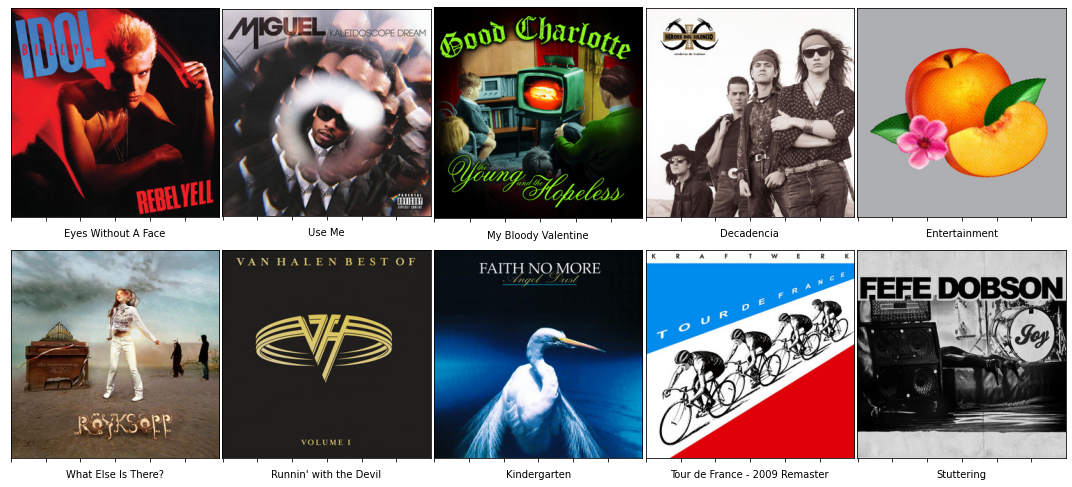

In [0]:
visualize_songs(name, url)

In [0]:
def recomendador(nome_musica):
   # Filtra o dataframe projetion_kmeans para obter o cluster da música com o nome especificado.
  cluster = projection_kmeans.filter(projection_kmeans['artists_song'] == nome_musica) \
                             .select('cluster_pca').collect()[0][0]

  # Filtra o dataframe projetion_kmeans para obter todas as músicas que pertencem ao mesmo cluster.
  # Seleciona apenas as colunas artists_song, id e pca_features.
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans['cluster_pca'] == cluster) \
                                          .select('artists_song', 'id', 'pca_features')

  # Filtra o dataframe musicas_recomendadas para obter os componentes da música com o nome especificado.
  # Seleciona apenas a coluna pca_features e coleta o primeiro resultado.
  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas['artists_song'] == nome_musica) \
                                           .select('pca_features').collect()[0][0]

  # Define uma função para calcular a distância euclidiana entre os componentes da música especificada e cada música recomendada.
  def calcula_distancia(value):
    return euclidean(componentes_musica, value)

  # Cria um User-Defined Function (UDF) a partir da função calcula_distancia.
  udf_calcula_distancia = f.udf(calcula_distancia, FloatType())

  # Adiciona uma nova coluna ao dataframe musicas_recomendadas contendo a distância entre cada música e a música especificada.
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('dist_calc', udf_calcula_distancia('pca_features'))

  # Cria um novo dataframe contendo as 10 músicas mais próximas à música especificada, ordenadas por distância.
  df_recomendadas_final = spark.createDataFrame(musicas_recomendadas_dist.sort('dist_calc') \
                                          .take(10)) \
                                          .select(['artists_song', 'id', 'dist_calc'])

  # Pega o ID da música que você forneceu como entrada (nome_musica) do DataFrame projection_kmeans.
  id_musica = projection_kmeans.filter(projection_kmeans['artists_song'] == nome_musica) \
                             .select('id').collect()[0][0]   

  # Pega as informações da API do Spotify e armazena em listas
  playlist_id = df_recomendadas_final.select('id').collect()

  name = []
  url = []

  for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

# Plota as capas dos albuns
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
    image = io.imread(u)
    plt.imshow(image)
    ax.get_yaxis().set_visible(False)
    plt.xticks(color = 'w', fontsize = 0.1)
    plt.yticks(color = 'w', fontsize = 0.1)
    plt.xlabel(name[i], fontsize = 10)
    plt.tight_layout(h_pad=0.7, w_pad=0)
    plt.subplots_adjust(wspace=None, hspace=None)
    plt.grid(visible=None)
  plt.show()

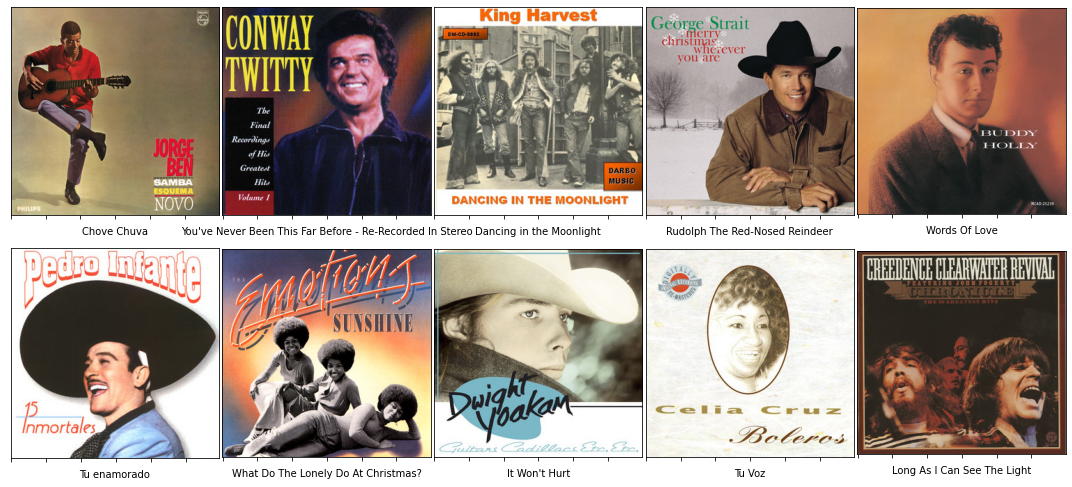

In [0]:
recomendador('Jorge Ben Jor - Chove Chuva')

O `recomendador` fará todas as etapas:

* Buscar músicas do mesmo cluster;
* Calcular a distância entre elas;
* Ordená-las pela distância;
* Trazer o resultado em um formato diferente, acionando a API do Spotify para perguntar qual é a capa do álbum e qual é o nome da música e plotar o resultado.

Assim, temos uma forma melhor de apresentar o resultado do recomendador e também de explorar.

Caso queira testar com mais clusters, basta fazer essa modificação, rodar a função, e você conseguirá o resultado de maneira mais rápida e ágil.